# What are `LightCurve` objects?

[`LightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve) objects are data objects which encapsulate the brightness of a star over time. They provide a series of common operations, for example folding, binning, plotting, etc. There are a range of subclasses of `LightCurve` objects specific to telescopes, including [`KeplerLightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.KeplerLightCurve.html#lightkurve.lightcurve.KeplerLightCurve) for Kepler and K2 data and [`TessLightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.TessLightCurve.html#lightkurve.lightcurve.TessLightCurve) for TESS data.

Although *Lightkurve* was designed with Kepler, K2 and TESS in mind, these objects can be used for a range of astronomy data.

You can create a `LightCurve` object from a `TargetPixelFile` object using Simple Aperture Photometry (see our tutorial for more information on Target Pixel Files [here](http://lightkurve.keplerscience.org/tutorials/1.02-target-pixel-files.html). Aperture Photometry is the simple act of summing up the values of all the pixels in a pre-defined aperture, as a function of time. By carefully choosing the shape of the aperture mask, you can avoid nearby contaminants or improve the strength of the specific signal you are trying to measure relative to the background.

To demonstrate, lets create a `KeplerLightCurve` from a `KeplerTargetPixelFile`.

First we open a Target Pixel File from [MAST](https://archive.stsci.edu/kepler/), this one is already cached from our previous [tutorial](https://docs.lightkurve.org/tutorials/01-what-are-lightcurves.html)!:

In [1]:
import numpy as np
import pandas as pd

from lightkurve import search_targetpixelfile

tpf = search_targetpixelfile('KIC 6922244', quarter=4).download()

Then we convert the target pixel file into a light curve using the [`to_lightcurve`](https://docs.lightkurve.org/api/lightkurve.targetpixelfile.KeplerTargetPixelFile.html#lightkurve.targetpixelfile.KeplerTargetPixelFile.to_lightcurve) command and the pipeline-defined aperture mask (look [here](https://keplerscience.arc.nasa.gov/pipeline.html#pixel-response-function) for more information about aperture photometry and the optimal aperture mask definition).

In [2]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

We've built a new `KeplerLightCurve` object called `lc`. Note in this case we've passed an **aperture_mask** to the `to_lightcurve` method. The default is to use the *Kepler* pipeline aperture. (You can pass your own aperture, which is a boolean `numpy` array.) By summing all the pixels in the aperture we have created a Simple Aperture Photometry (SAP) lightcurve.

`KeplerLightCurve` has many useful functions that you can use. As with Target Pixel Files you can access the meta data very simply:

In [3]:
lc.mission

'Kepler'

In [4]:
lc.quarter

4

And you still have access to time and flux attributes. In a light curve, there is only one flux point for every time stamp. The data can be displayed as a table using `Pandas`:

In [5]:

info = pd.DataFrame(data={'Time (BKJD)': lc.time, 'Flux (e-/s)': lc.flux})
info

,Time (BKJD),Flux (e-/s)
0,352.376325,43689.148438
1,352.396758,43698.078125
2,352.437624,43694.105469
3,352.458058,43698.316406
4,352.478491,43687.648438
...,...,...
4111,442.121767,43160.664062
4112,442.142201,43157.625000
4113,442.162635,43155.800781
4114,442.183070,43148.464844


You can also check the Combined Differential Photometric Precision (CDPP) RMS per transit duration noise metric (see [Gilliland et al., 2011](https://iopscience.iop.org/article/10.1088/0067-0049/197/1/6/pdf) for more details) of the lightcurve using the built in method [`estimate_cdpp`](https://docs.lightkurve.org/api/lightkurve.lightcurve.FoldedLightCurve.html#lightkurve.lightcurve.FoldedLightCurve.estimate_cdpp):

In [6]:
lc.estimate_cdpp()

75.2986784032268

The above is the Savitzky-Golay CDPP noise metric in units parts-per-million (ppm)

Now we can use the built in `plot` function on the `KeplerLightCurve` object to plot the time series. You can pass `plot` any keywords you would normally pass to [`matplotlib.pyplot.plot`](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html).

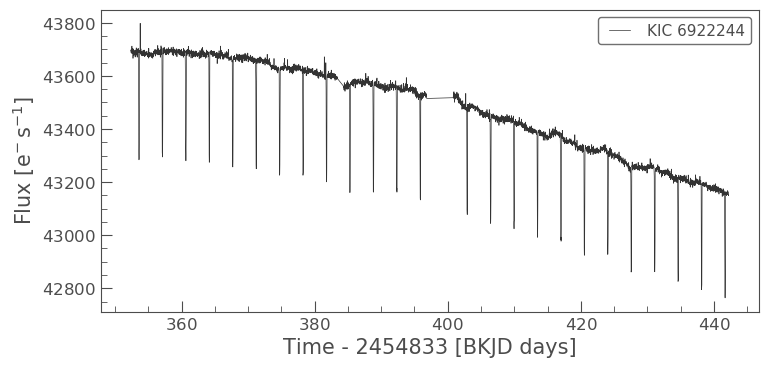

In [7]:
%matplotlib inline
lc.plot();

There are a set of useful functions in [`LightCurve`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve) objects which you can use to work with the data. These include:
* [`flatten()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.flatten): Remove long term trends using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)
* [`remove_outliers()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.remove_outliers): Remove outliers using simple sigma clipping
* [`remove_nans()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.remove_nans): Remove infinite or NaN values (these can occur during thruster firings)
* [`fold()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.fold): Fold the data at a particular period
* [`bin()`](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html#lightkurve.lightcurve.LightCurve.bin): Reduce the time resolution of the array, taking the average value in each bin.

We can use these simply on a light curve object

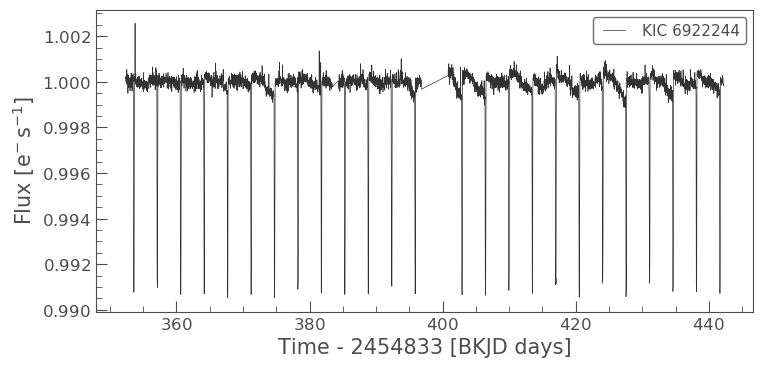

In [8]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

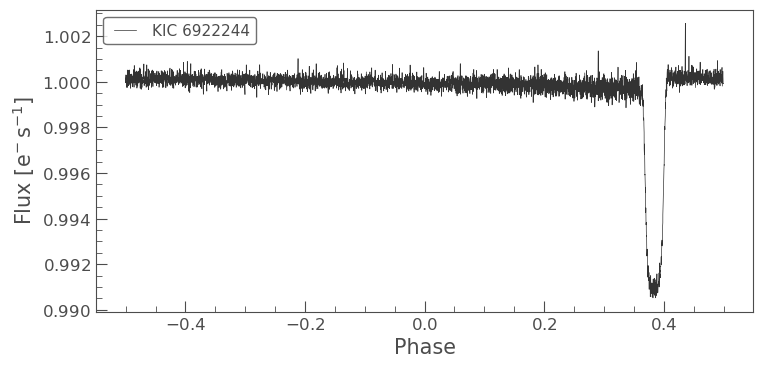

In [9]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

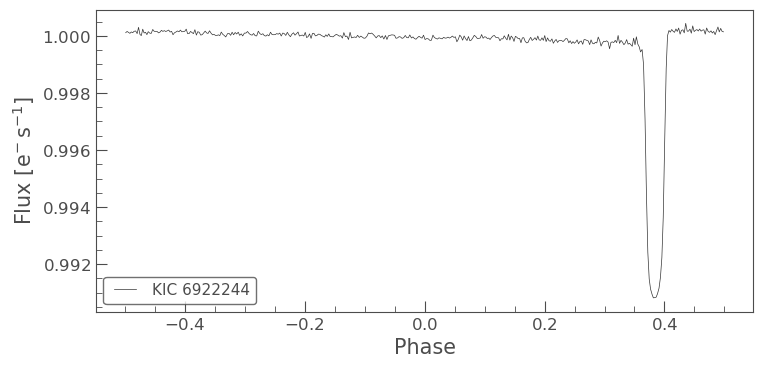

In [10]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

Or we can do these all in a single (long) line!

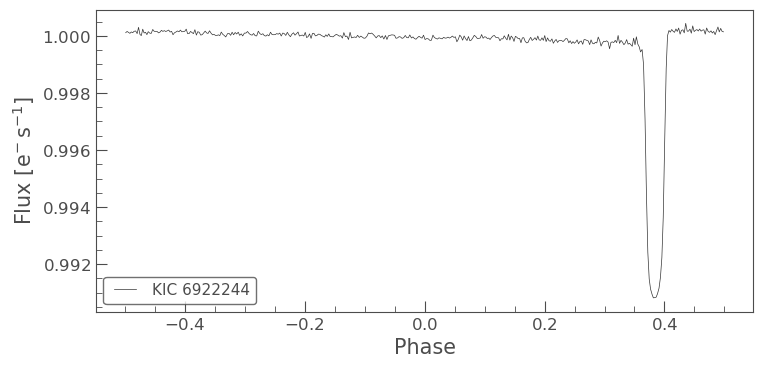

In [11]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

Congratulations! You have now learnt about LightCurve objects and how you can manipulate them. Move on to our [next tutorial](https://docs.lightkurve.org/tutorials/01-lightcurve-files.html) where you will learn about LightCurveFile objects.